**Escalonamento de dados** üìè

Afinal, porque as escalas dos dados s√£o importantes?

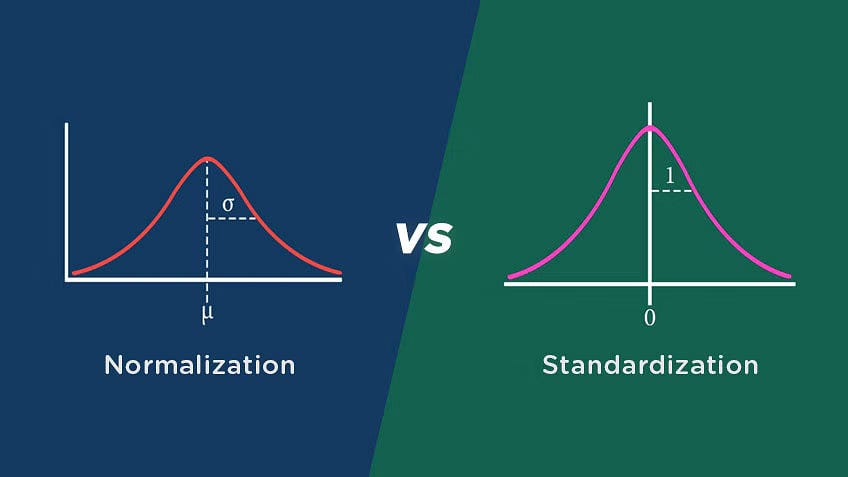

Para definirmos o que seriam as escalas dos dados, podemos dizer que as escalas referem-se √† **amplitude  ou intervalo** dos valores de um conjunto num√©rico de dados.

A t√©cnica **"feature scaling"** √© o processo de normalizar as escalas das features, colocando-as em uma escala comum. Existem duas abordagens comuns para fazer isso: a normaliza√ß√£o (tamb√©m conhecida como min-max scaling) e a padroniza√ß√£o (tamb√©m conhecida como z-score normalization). No aprendizado de m√°quina, muitos algoritmos podem ser sens√≠veis √†s escalas dos dados, podendo se confundir e achar que as escalas maiores, por exemplo, s√£o mais relevantes do que as vari√°veis de escalas menores. Esse problema pode afetar principalmente algoritmos de redes neurais, onde a normaliza√ß√£o dessas vari√°veis √© obrigat√≥ria para a representa√ß√£o da dimens√£o ficar em uma mesma escala e contribuir com a converg√™ncia mais r√°pida dos dados. N√£o somente em deep learning essa t√©cnica pode ajudar, mas tamb√©m com algoritmos que lidam com dist√¢ncias, como o k-means, KNN, PCA, SVM e regress√£o log√≠stica por exemplo.

Na aula de hoje vamos aprender na pr√°tica como utilizar a normaliza√ß√£o e a padroniza√ß√£o para criar um modelo de machine learning. Vamos l√°? üòÄ






Este conjunto de dados que vamos utilizar na aula de hoje, cont√©m detalhes dos clientes de um banco e a vari√°vel alvo √© uma vari√°vel bin√°ria que reflete o fato de o **cliente ter deixado o banco (fechado sua conta) ou continuar a ser cliente**. üí∞

**√â o famoso modelo de churn!**

Nessa aula vamos criar um **modelo preditivo para prever se o cliente vai deixar o banco**, e √© claro, que vamos **testar nossos dados com e sem escalonamento**.  üìè


Bem, logo j√° percebemos aqui que essa base de dados nos traz um desafio para ser resolvido com modelos supervisionados. Nessa aula n√£o iremos focar muito nos detalhes dos modelos, mas n√£o preocupe que na aula de Machine Learning Avan√ßado voc√™ ir√° conhecer cada detalhe!

Vamos nessa aula focar em **padroniza√ß√£o** e **normaliza√ß√£o**, utilizando essa base como exemplo.

Vamos realizar o upload dessa base de dados para come√ßar a construir o modelo!

In [1]:
import pandas as pd

df = pd.read_csv("Churn_Modelling.csv", sep=";")
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [2]:
df.shape

(9865, 14)

Observe que essa base de dados cont√©m um grande n√∫mero de features (ao total s√£o 14).

Dentre essas features dispon√≠veis na base, muitas **possuem propor√ß√µes diferentes quando analisamos as escalas dos dados**, por exemplo, **idade**, **sal√°rio**, o n√∫mero de **posse** da pessoa, n√∫mero de **produtos**, o **score de cr√©dito** e assim por diante.

Ser√° que essas vari√°veis t√™m uma amplitude  t√£o diferente, pode impactar nosso modelo preditivo?

Bem, como pr√≥ximo passo, vamos plotar alguns boxplots para analisarmos como est√° a distribui√ß√£o dessas vari√°veis quantitativas para descobrirmos a varia√ß√£o de amplitude dos dados:

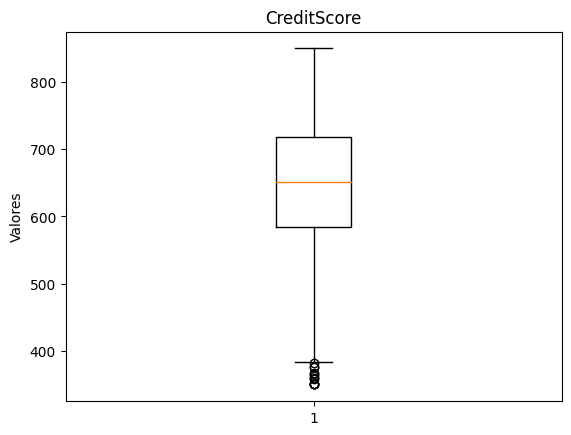

In [3]:
import matplotlib.pyplot as plt

# Criar o gr√°fico de boxplot
plt.boxplot(df['CreditScore'])
plt.title('CreditScore')
plt.ylabel('Valores')
plt.show()

In [4]:
print(df['CreditScore'].min())
print(df['CreditScore'].max())

350
850


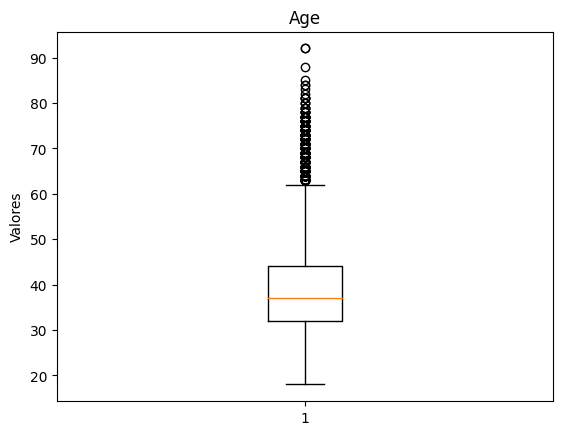

In [5]:
# Criar o gr√°fico de boxplot
plt.boxplot(df['Age'])
plt.title('Age')
plt.ylabel('Valores')
plt.show()

In [6]:
print(df['Age'].min())
print(df['Age'].max())

18
92


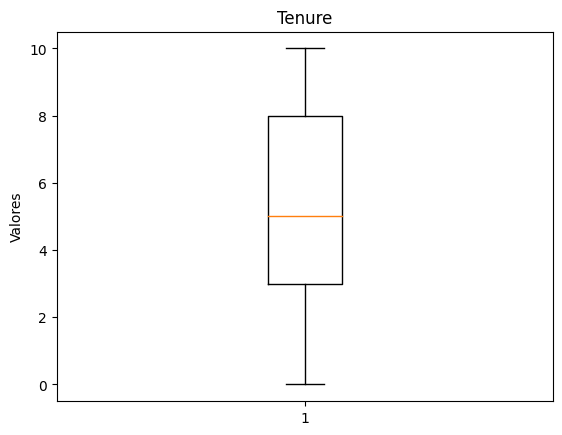

In [7]:
# Criar o gr√°fico de boxplot
plt.boxplot(df['Tenure'])
plt.title('Tenure')
plt.ylabel('Valores')
plt.show()

In [8]:
print(df['Tenure'].min())
print(df['Tenure'].max())

0
10


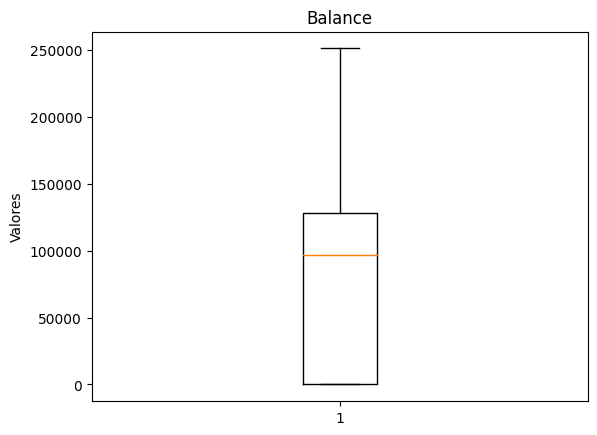

In [9]:
# Criar o gr√°fico de boxplot
plt.boxplot(df['Balance'])
plt.title('Balance')
plt.ylabel('Valores')
plt.show()

In [10]:
print(df['Balance'].min())
print(df['Balance'].max())

0.0
250898.09


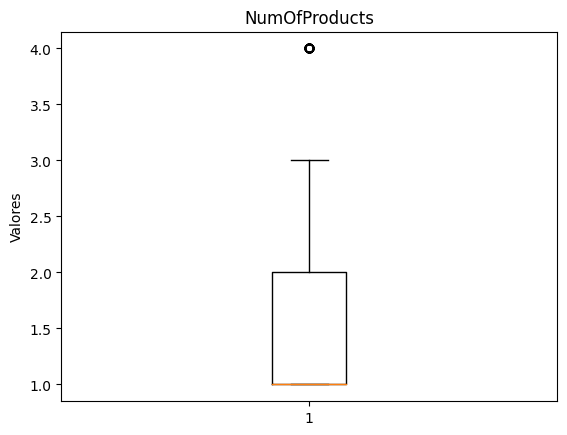

In [11]:
# Criar o gr√°fico de boxplot
plt.boxplot(df['NumOfProducts'])
plt.title('NumOfProducts')
plt.ylabel('Valores')
plt.show()

In [12]:
print(df['NumOfProducts'].min())
print(df['NumOfProducts'].max())

1
4


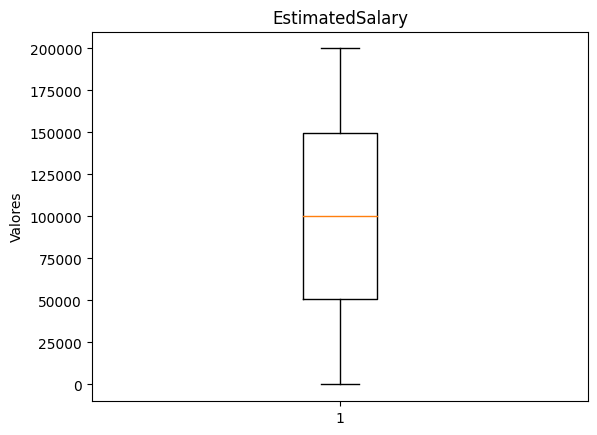

In [13]:
# Criar o gr√°fico de boxplot
plt.boxplot(df['EstimatedSalary'])
plt.title('EstimatedSalary')
plt.ylabel('Valores')
plt.show()

In [14]:
print(df['EstimatedSalary'].min())
print(df['EstimatedSalary'].max())

11.58
199992.48


OK, conclu√≠mos que as escalas s√£o bem diferentes! Falando sobre transforma√ß√µes nos dados, os dados em formato de string (as categorias) tamb√©m passam por um tipo de transforma√ß√£o. Vamos aplicar nos dados em formato de texto o **LabelEncoder**. O LabelEncoder transforma r√≥tulos de classes em n√∫meros inteiros.

Mas por que √© importante fazer esse tipo de transforma√ß√£o nas categorias? ü§î

Para os algoritmos de machine learning funcionarem, √© necess√°rio **transformar a informa√ß√£o em um formato num√©rico para que o computador possa compreender** o que estamos querendo apresentar.

In [15]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Ajustar e transformar os r√≥tulos
df['Surname'] = label_encoder.fit_transform(df['Surname'])
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df.head()

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0          1    15634602     1111          619          0       0   42   
1          2    15647311     1173          608          2       0   41   
2          3    15619304     2032          502          0       0   42   
3          4    15701354      289          699          0       0   39   
4          5    15737888     1816          850          2       0   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

OK, como pr√≥ximo passo, antes de normalizar ou padronizar, vamos separar os dados em treino e teste:

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Exited']) # Vari√°veis caracter√≠sticas
y = df['Exited'] # O que eu quero prever. (Target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Quanto a esses detalhes de separa√ß√£o de dados em treino e teste, n√£o se preocupe que em Machine Learning avan√ßado voc√™ ir√° aprender cada passo! üòÑ

Vamos escalonar os dados? Importamos os escalonadores da biblioteca **sklearn** em **preprocessing** o **StandardScaler** e **MinMaxScaler**:

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

**Aplicando MinMax Scaler**

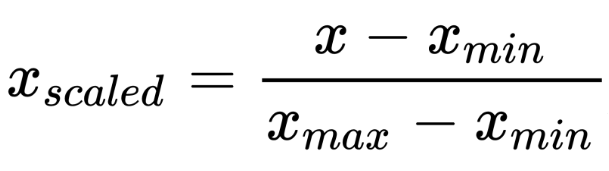

O escalonamento min-max (normaliza√ß√£o) √© muito simples! Basicamente os valores s√£o deslocados e redimensionados para que acabem variando de 0 a 1. Observe a f√≥rmula a seguir, esse c√°lculo subtrai o valor m√≠nimo e divide pelo m√°ximo, menos o m√≠nimo.


In [20]:
scaler = MinMaxScaler() #chamando o metodo de normaliza√ß√£o dos dados (0-1)

scaler.fit(X_train)

x_train_min_max_scaled = scaler.transform(X_train)
x_test_min_max_scaled= scaler.transform(X_test)

In [21]:
x_train_min_max_scaled

array([[0.35201121, 0.11669547, 0.88507719, ..., 1.        , 0.        ,
        0.34768845],
       [0.60456274, 0.78062996, 0.35849057, ..., 1.        , 0.        ,
        0.46923837],
       [0.89393636, 0.07744496, 0.17495712, ..., 0.        , 1.        ,
        0.56001428],
       ...,
       [0.53922353, 0.03258209, 0.5626072 , ..., 0.        , 0.        ,
        0.46092526],
       [0.08595157, 0.96788994, 0.59691252, ..., 1.        , 0.        ,
        0.48738065],
       [0.7273364 , 0.56228399, 0.84425386, ..., 1.        , 1.        ,
        0.26761502]])

Mas voc√™ deve estar se perguntando:

*‚Äúpor que √© realizado o escalonamento (fit) na base treino e n√£o na base de teste?‚Äù.*

Bem, realizamos a transforma√ß√£o do escalonamento na base de treino para **evitar que a base de teste fique exatamente igual √†s estat√≠sticas da base de treino**, o que evita **‚Äúvazamento‚Äù** desses dados. A base de teste em geral deve representar uma base de dados nunca vista antes pelo algoritmo, justamente para testar se o algoritmo consegue generalizar os dados.


Agora vamos testar com **StandarScaler**.

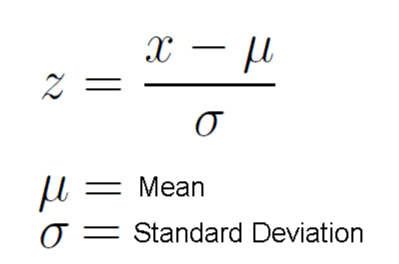

A padroniza√ß√£o n√£o vincula valores espec√≠ficos nos m√≠nimos e m√°ximos, o que pode ser um ponto de aten√ß√£o em alguns algoritmos (por exemplo, redes neurais). No entanto, a padroniza√ß√£o √© muito menos afetada por outliers.  Na biblioteca do Scikit-Learn temos a padroniza√ß√£o em StandardScaler.




In [22]:
scaler = StandardScaler() #chamando o metodo de padroniza√ß√£o dos dados (m√©dia e std)

scaler.fit(X_train)# qual m√©dia e std ser√° utilizado para o escalonamento

x_train_standard_scaled = scaler.transform(X_train)
x_test_standard_scaled  = scaler.transform(X_test)

In [23]:
x_train_standard_scaled

array([[-0.50073964, -1.33102082,  1.28295781, ...,  0.64920701,
        -1.04034701, -0.53624445],
       [ 0.38340744,  0.98483691, -0.54107698, ...,  0.64920701,
        -1.04034701, -0.11539063],
       [ 1.39646344, -1.46792981, -1.17681548, ..., -1.54034073,
         0.96121774,  0.19891141],
       ...,
       [ 0.15466416, -1.62441517,  0.16595931, ..., -1.54034073,
        -1.04034701, -0.1441739 ],
       [-1.43217667,  1.63801503,  0.28478893, ...,  0.64920701,
        -1.04034701, -0.05257492],
       [ 0.81322062,  0.22322832,  1.14155055, ...,  0.64920701,
         0.96121774, -0.81349026]])

In [24]:
from sklearn.neighbors import KNeighborsClassifier

Vamos testar o algoritmo sem os escalonadores e validar os resultados!

In [27]:
model = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previs√µes no conjunto de teste
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

# Avaliar a precis√£o do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acur√°cia: {accuracy:.2f}')

Acur√°cia: 0.76


Testando com a normaliza√ß√£o:

In [28]:
model_min_max = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo
model_min_max.fit(x_train_min_max_scaled, y_train)

# Fazer previs√µes no conjunto de teste
y_pred_min_max = model.predict(x_test_min_max_scaled)

accuracy_min_max = accuracy_score(y_test, y_pred_min_max)
print(f'Acur√°cia: {accuracy_min_max:.2f}')

Acur√°cia: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Testando com a padroniza√ß√£o

In [29]:
model_standard = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo
model_standard.fit(x_train_standard_scaled, y_train)

# Fazer previs√µes no conjunto de teste
y_pred_standard = model.predict(x_test_standard_scaled)

accuracy_strandard = accuracy_score(y_test, y_pred_standard)
print(f'Acur√°cia: {accuracy_strandard:.2f}')

Acur√°cia: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Uau! Os escalonadores realmente mudam  o resultado de alguns algoritmos! Nessa aula aprendemos a import√¢ncia dos escalonadores. Que tal voc√™ testar em com mais tipos de algoritmos?